In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models,datasets
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 41s 0us/step


In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
x_train.shape


(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[::5]

array([[6],
       [1],
       [4],
       ...,
       [8],
       [4],
       [2]], dtype=uint8)

In [12]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
y_test=y_test.reshape(-1,)

In [16]:
classes=['airplane','automobile','cat','eleplant','dog','frog','horse','ship','truck','lion']

In [26]:
def plot_sample(X,y,index):
    plt.figure(figsize=(20,4))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [28]:
def plot_sample(x, y, index):
    plt.figure(figsize=(4, 4))  # Larger figure size
    plt.imshow(x[index], interpolation='nearest')  # No smoothing
    plt.title(class_names[int(y[index])])
    plt.axis('off')
    plt.grid(False)
    plt.show()


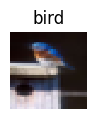

In [41]:
plot_sample(x_train, y_train, 13)


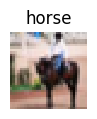

In [40]:
plot_sample(x_train,y_train,11)

In [38]:
def plot_sample(x, y, index):
    plt.figure(figsize=(1,1))  # Avoid too much upscaling
    plt.imshow(x[index], interpolation='none')  # Keep pixel edges sharp
    plt.title(class_names[int(y[index])])
    plt.axis('off')
    plt.grid(False)
    plt.show()


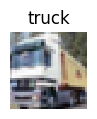

In [46]:
plot_sample(x_train,y_train,1)

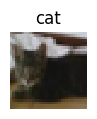

In [49]:
plot_sample(x_train,y_train,9)

In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000,)


In [12]:
from tensorflow.keras import models, layers
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")  # For CIFAR-10
])

ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ann.fit(X_train, y_train, epochs=5)


C:\Users\kisho\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.3064 - loss: 1.9275
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4229 - loss: 1.6345
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4575 - loss: 1.5459
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4758 - loss: 1.4903
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4974 - loss: 1.4319


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict on the test set
y_pred = ann.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = [np.argmax(element) for element in y_pred]

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.55      0.57      1000
           1       0.55      0.72      0.63      1000
           2       0.40      0.39      0.40      1000
           3       0.35      0.38      0.37      1000
           4       0.42      0.47      0.45      1000
           5       0.45      0.34      0.39      1000
           6       0.47      0.69      0.56      1000
           7       0.74      0.41      0.53      1000
           8       0.58      0.70      0.64      1000
           9       0.67      0.40      0.50      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.50     10000
weighted avg       0.52      0.51      0.50     10000



In [19]:
import seaborn as sns

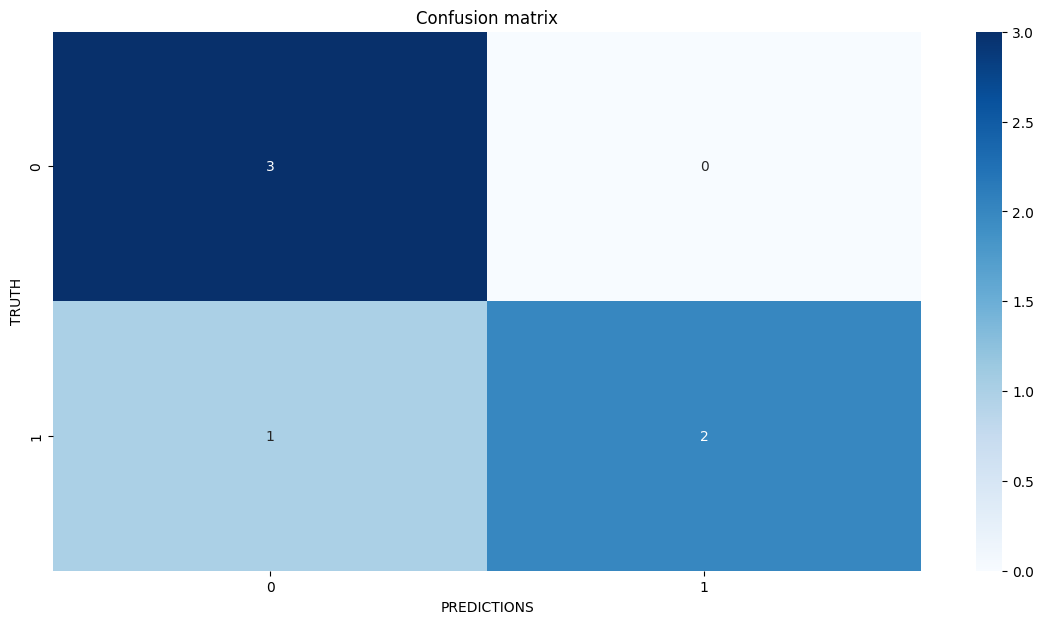

In [26]:

plt.figure(figsize=(14,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("TRUTH")
plt.xlabel("PREDICTIONS")
plt.title("Confusion matrix")
plt.show()


In [27]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])



C:\Users\kisho\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0917 - loss: 2.3032


[2.303072929382324, 0.09359999746084213]

In [33]:
y_pred=model.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[0.10648383, 0.09276056, 0.09098323, 0.09029385, 0.111673  ,
        0.10346173, 0.1030114 , 0.09955658, 0.10343844, 0.09833748],
       [0.10713739, 0.09701334, 0.08617469, 0.08091581, 0.11256815,
        0.10331523, 0.10028074, 0.10383302, 0.10446048, 0.10430114],
       [0.10281356, 0.09965502, 0.08695232, 0.09125756, 0.10766938,
        0.10113806, 0.10258459, 0.1023354 , 0.10260257, 0.10299153],
       [0.10505911, 0.09428374, 0.08976438, 0.08590107, 0.11146389,
        0.10228536, 0.10148136, 0.09761503, 0.10721264, 0.1049335 ],
       [0.09996973, 0.09163883, 0.09134574, 0.09279746, 0.11009749,
        0.10489075, 0.10179067, 0.10081439, 0.10703494, 0.09962004]],
      dtype=float32)

In [34]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]


[4, 4, 4, 4, 4]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

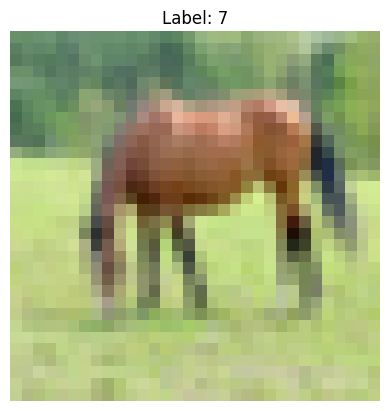

In [41]:
def plot_sample(X, y, index):
    plt.imshow(X[index], cmap='gray')  
    plt.title(f"Label: {y[index]}")
    plt.axis('off')
    plt.show()

plot_sample(X_test, y_test,60)


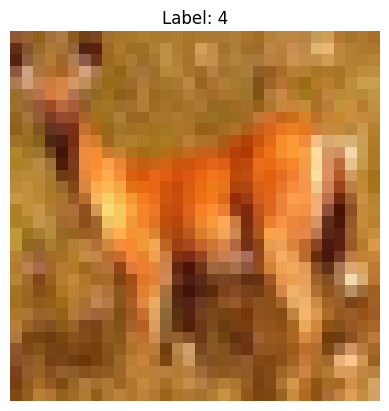

In [44]:
plot_sample(X_test, y_test,110)